<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/data_ananlysis_with_pandas/Multivariate_Analysis_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

!pip install openml

import openml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 2.9 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.13.1-py3-none-any.whl size=142784 sha256=76a5c35de3ff4a41b333083a82a47b286f13e9767ff98f5d688d4df05371387c
  Stored in directory: /root/.cache/pip/wheels/f7/7a/fa/f73edc5ccecbab13bbf5fb888f2f943720f77114a1fa4ceffe
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=95e147b365d1d73006ea2febe5c8ed51f2282c258a28cd59975f03476a258210
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


In [2]:
titanic_data = openml.datasets.get_dataset(40945)

In [3]:
# Get the data and target separately
X, y, _, _ = titanic_data.get_data(target=titanic_data.default_target_attribute)

In [4]:
# Get the feature names from the Titanic dataset
attribute_names = titanic_data.features.values()
feature_names = [feat.name for feat in attribute_names if feat.name != titanic_data.default_target_attribute]

In [5]:
df = pd.DataFrame(X, columns=feature_names)

In [6]:
df['survived'] = y

In [7]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


In [8]:
df.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   uint8   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   uint8   
 5   parch      1309 non-null   uint8   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), object(5), uint8(3)
memory usage: 90.0+ KB


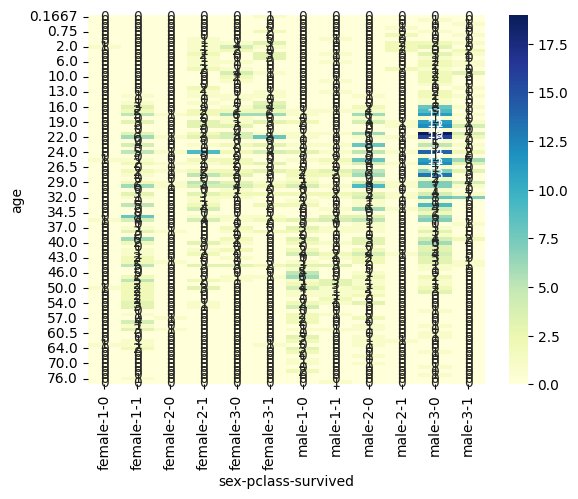

In [11]:
import seaborn as sns

# Create heatmap

sns.heatmap(pd.crosstab(df['age'], [df['sex'], df['pclass'], df['survived']]), annot=True, fmt="d", cmap="YlGnBu")

plt.show()

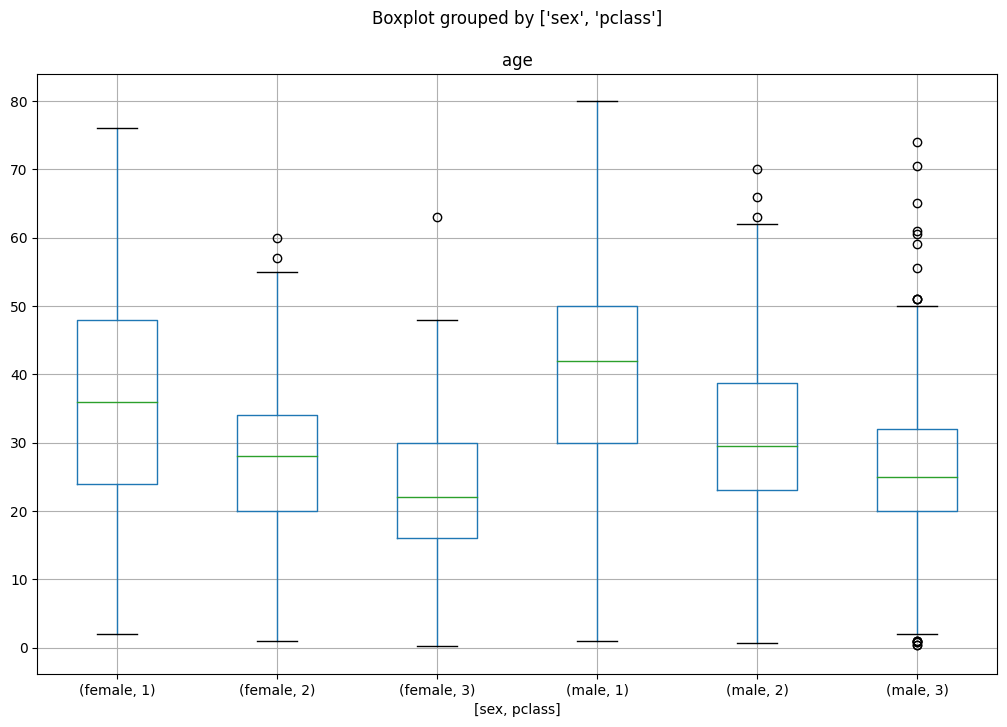

In [12]:
import matplotlib.pyplot as plt

# Create grouped box plot

df.boxplot(column='age', by=['sex', 'pclass'], figsize=(12,8))

plt.show()

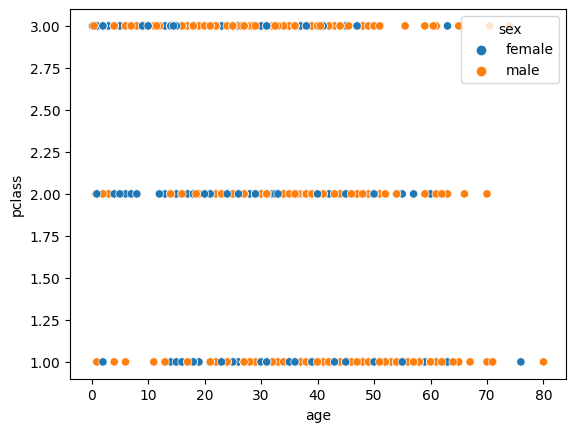

In [13]:
# Create scatter plot with color-coded markers

sns.scatterplot(x="age", y="pclass", hue="sex", data=df)

plt.show()

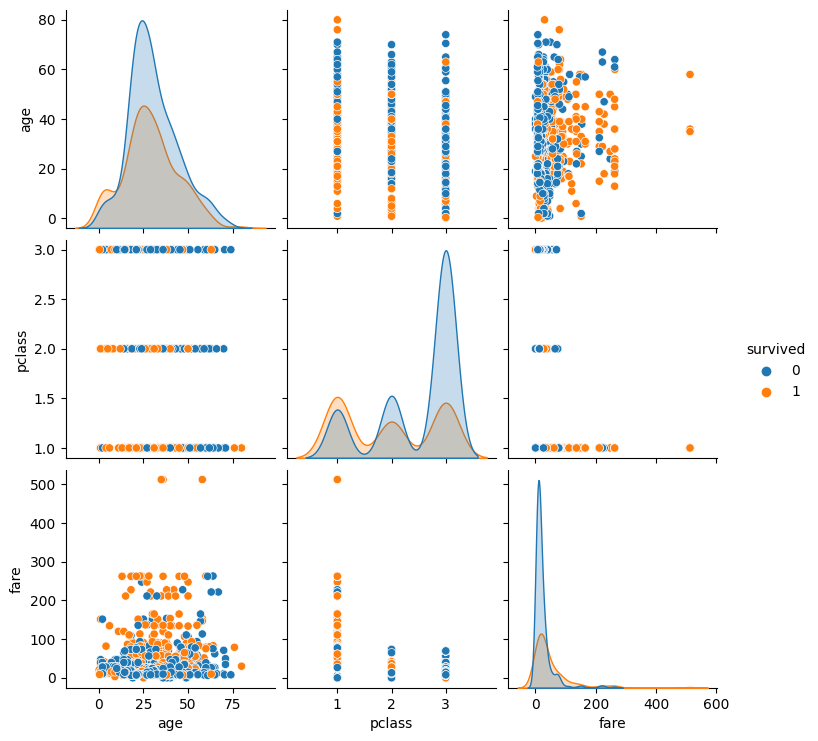

In [16]:
# Create pairplot

sns.pairplot(df, vars=['age', 'pclass', 'fare'], hue="survived")

plt.show()

<ipython-input-17-4653a0c8e921>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


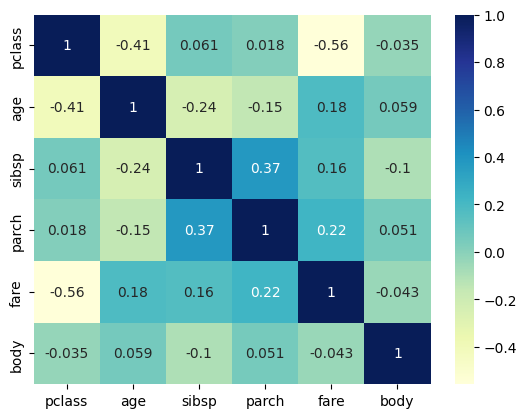

In [17]:
# Create correlation matrix

corr = df.corr()

sns.heatmap(corr, annot=True, cmap="YlGnBu")

plt.show()

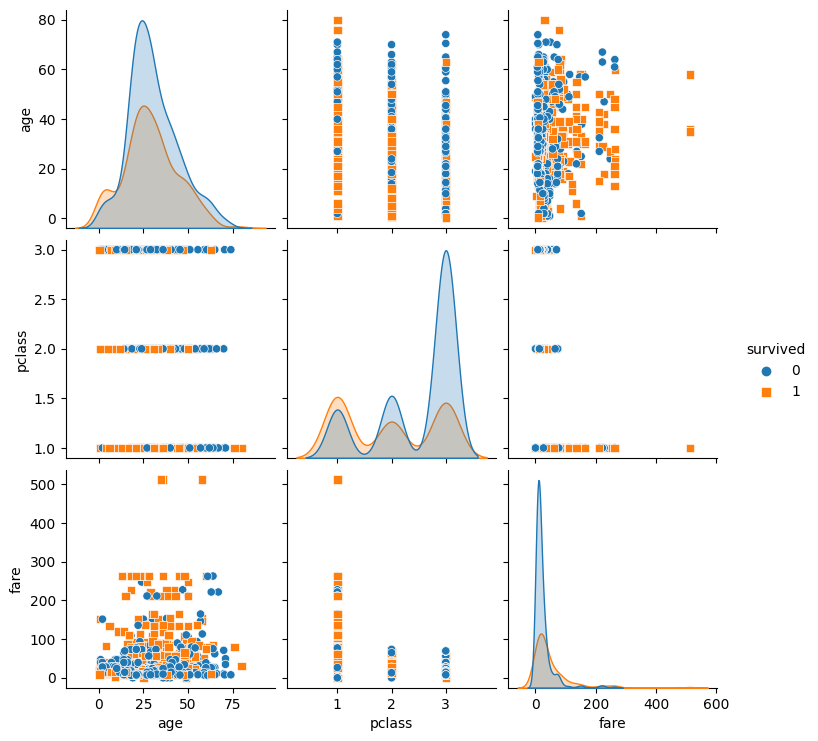

In [19]:
# Create scatter plot matrix

sns.pairplot(df, vars=['age', 'pclass', 'fare'], hue="survived", markers=['o', 's'])

plt.show()